## Импорт библиотек

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Соединение с базой данных

In [3]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## Запрос к базе данных

In [4]:
query = 'SELECT uid, timestamp FROM checker WHERE uid LIKE "user_%"'
checker = pd.read_sql(query, connection)
checker

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


## Датафрейм и график

In [5]:
checker['timestamp'] = pd.to_datetime(checker['timestamp'])
checker['hour'] = checker['timestamp'].dt.hour
checker['day'] = checker['timestamp'].dt.day
checker['week_day'] = checker['timestamp'].dt.weekday
checker['type'] = checker['week_day'].apply(lambda x: 'weekday' if x < 5 else 'weekend')
del checker['week_day']
del checker['timestamp']
checker

,uid,hour,day,type
0,user_4,5,17,weekday
1,user_4,5,17,weekday
2,user_4,5,17,weekday
3,user_4,5,17,weekday
4,user_4,5,17,weekday
...,...,...,...,...
3202,user_1,20,21,weekday
3203,user_1,20,21,weekday
3204,user_1,20,21,weekday
3205,user_1,20,21,weekday


In [6]:
weekdays = checker[checker['type'] == 'weekday'][['hour']].reset_index(drop=True)
weekdays

,hour
0,5
1,5
2,5
3,5
4,5
...,...
2032,20
2033,20
2034,20
2035,20


In [7]:
weekends = checker[checker['type'] == 'weekend'][['hour']].reset_index(drop=True)
weekends

,hour
0,7
1,13
2,13
3,13
4,13
...,...
1165,22
1166,22
1167,22
1168,22


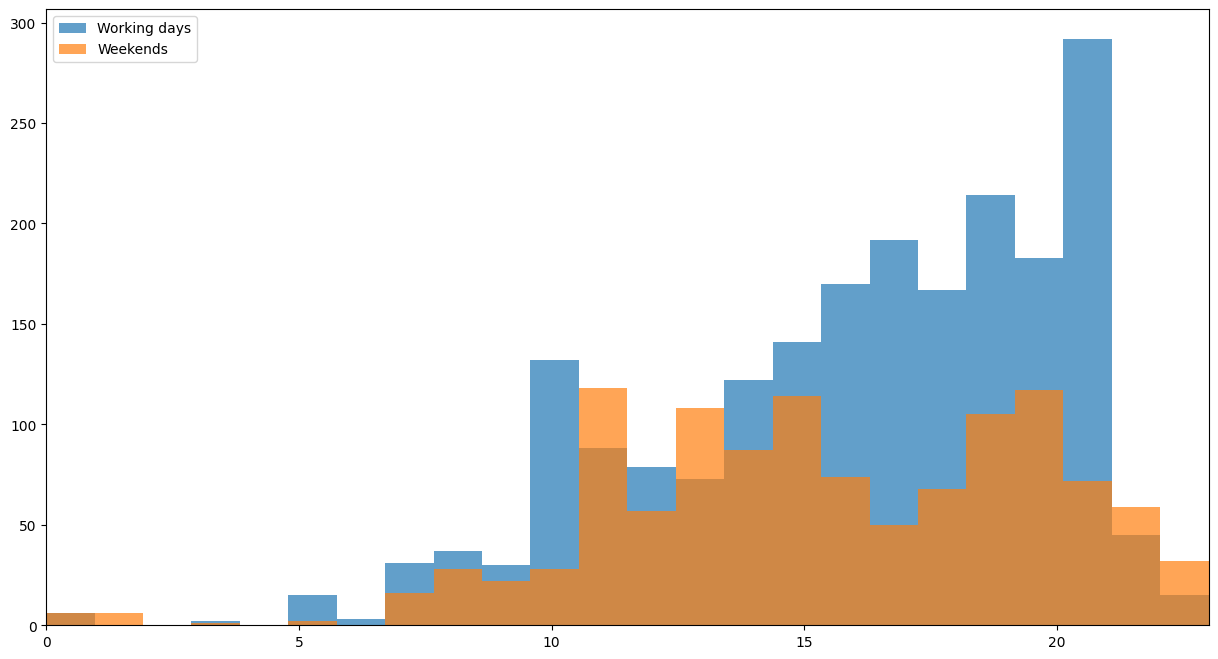

In [8]:
plt.figure(figsize=(15, 8))
plt.hist(weekdays['hour'],
         bins=24,
         alpha=0.7,
         label='Working days',
         )
plt.hist(weekends['hour'],
         bins=24,
         alpha=0.7,
         label='Weekends',
         )
plt.legend(loc='upper left')
plt.xlim(0, 23)
plt.show()

## Закрытие соединения с БД

In [9]:
connection.close()

## Бывают ли часы, когда общее количество коммитов в выходные дни было выше, чем в рабочие дни?

### Да

In [10]:
print(weekends[weekends['hour'] == 11].count())
print(weekdays[weekdays['hour'] == 11].count())


hour    118
dtype: int64
hour    88
dtype: int64


In [11]:
print("Выходные:\n", weekends[weekends['hour'] == 13].count())
print("Будни:\n", weekdays[weekdays['hour'] == 13].count())

Выходные:
 hour    108
dtype: int64
Будни:
 hour    73
dtype: int64


In [12]:
print("Выходные:\n", weekends[weekends['hour'] == 22].count())
print("Будни:\n", weekdays[weekdays['hour'] == 22].count())

Выходные:
 hour    59
dtype: int64
Будни:
 hour    45
dtype: int64


In [13]:
print("Выходные:\n", weekends[weekends['hour'] == 23].count())
print("Будни:\n", weekdays[weekdays['hour'] == 23].count())

Выходные:
 hour    32
dtype: int64
Будни:
 hour    15
dtype: int64


### В 11, 12, 22, 23 часах, в выходные дни коммитов было больше